In [1]:
from utils import *
from metadata import *
from gen_imglst import * 
from vis_utils import * 
import utils
import tensorflow as tf
# utils.init_dev(utils.get_dev())
# utils.allow_growth()

%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib

In [4]:
nimgs=unpickle('./nimgs.pkl')

nimgs={k:v for k,v in nimgs.iteritems() if k in imagenet10k}

num=np.array(nimgs.values())
num.min(),num.max(),num.sum()

cls=utils.read_list('./tmppartition1000').astype(int)

(0, 3047, 5754283)

In [5]:
%run kahip.py

In [45]:
len(fine),len(coarse)
pickle(fine,'fine.pkl')
pickle(coarse,'coarse.pkl')

(1000, 1000)

pickle into fine.pkl
pickle into coarse.pkl


In [46]:
names=np.concatenate(np.array(fine)).tolist()
name2fine={v:k for k,v in enumerate(names)}
fine2coarseind={}
ind=0
for fs,c in zip(fine,coarse):
    for f in fs:
        fine2coarseind[f]=ind
    ind+=1    
name2coarse={}
for k,v in enumerate(names):
    name2coarse[v]=fine2coarseind[v]

In [50]:
train_file = HOME + '/prj/few-shot/data/imglst/img10k.train.twolevel'
test_file = HOME + '/prj/few-shot/data/imglst/img10k.test.twolevel'
prefix = HOME + '/prj/few-shot/data/imagenet-raw'

@chdir_to_root
def gen_imglst( prefix, train_file, test_file):
    os.chdir(prefix)
    imgs_train_l, imgs_test_l = [], []
    for ind, cls in enumerate(names):
        if not osp.exists(cls): continue
#         imgs = tf.gfile.Glob(cls + '/*.JPEG')
        imgs = [cls+'/'+img_ for img_ in d[cls]]
        if len(imgs) == 0:
            utils.rm(cls, True)
            continue
        assert len(imgs) >= 10
        imgs = np.array(imgs)
        imgs_test = np.random.choice(imgs, max(3, imgs.shape[0] * 1 // 10), replace=False)
        imgs_train = np.setdiff1d(imgs, imgs_test)

        imgs_train_l.append(
            np.stack((imgs_train, 
                      np.ones_like(imgs_train, dtype=int) * name2fine[cls],
                      np.ones_like(imgs_train, dtype=int) * name2coarse[cls]
                     ), axis=-1)
        )
        imgs_test_l.append(
            np.stack((imgs_test, 
                      np.ones_like(imgs_test, dtype=int) *  name2fine[cls],
                      np.ones_like(imgs_test, dtype=int) * name2coarse[cls]
                     ), axis=-1)
        )

    imgs_train = np.concatenate(imgs_train_l, axis=0)
    np.random.shuffle(imgs_train)

    np.savetxt(train_file, imgs_train, delimiter=' ', fmt='%s')
    np.savetxt(test_file, np.concatenate(imgs_test_l, axis=0), delimiter=' ', fmt='%s')

gen_imglst(  prefix, train_file, test_file)

In [ ]:

vl
w.shape
(vl * vl - vl) //2

w

with open('res.txt', 'w') as f:
    f.write('{} {} {}\n'.format(v.shape[0],(vl * vl - vl) //2, 11))
    for i in range(vl):
        f.write('{} '.format( nimgs[v[i]] ))
        for j in range( vl):
            if i == j : continue 
            f.write('{} {} '.format(j+1, w[i, j]))
        f.write('\n')

!tail ~/res.txt 

!/home/wangxinglu/KaHIP/deploy/kaffpa ~/res.txt --k 1000 --preconfiguration=strong

!head tmppartition2

!/home/wangxinglu/KaHIP/deploy/graphchecker ~/res.txt 

In [15]:
coarse=[] 
fine=[]
for i, df in pd.DataFrame(data=cls,columns=['cls']).groupby('cls'):
    coarse.append('c'+str(i))
    finet=[v[t] for t in df.index]
    fine.append(finet)     

In [16]:
len(fine),len(coarse)

(1000, 1000)

In [17]:
tree=nx.DiGraph()
for c,fs in zip(coarse,fine):
    tree.add_edge('fall11',c)
    for f in fs: 
        tree.add_edge(c,f)

In [18]:
vis_nx(tree)

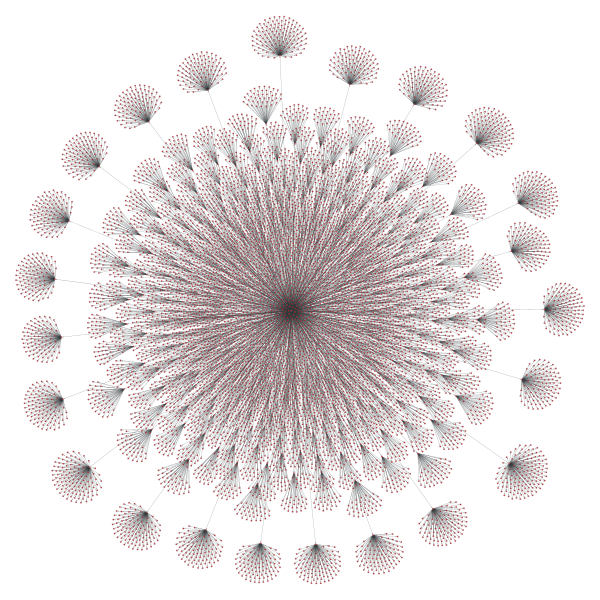

In [19]:
show_img('tmp.png')

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0a4d9d96d0, at 0x7f0a4d9d9090>

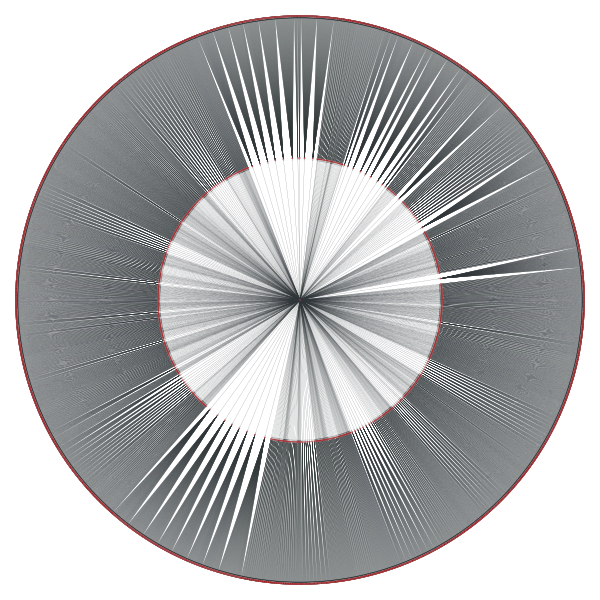

In [28]:
nxgraph=tree
nx.write_gml(nxgraph, 'tmp.gml')
g = load_graph('tmp.gml')
graph_draw(g,pos=radial_tree_layout(g,4538),output='tmp.png')
show_img('tmp.png')

In [23]:

@chdir_to_root
def tag_tree(tree_):
    max_depth = 0
    all_depth = []
    all_nchild = []
    # all_nimg = []
    for node in nx.dfs_preorder_nodes(tree_, 'fall11'):
        depth = nx.shortest_path_length(tree_, "fall11", node)
        max_depth = max(depth, max_depth)
        all_depth.append(depth)
        nchild = len(list((tree_.successors(node))))
        all_nchild.append(nchild)
        # if not nchild == 0:
        tree_.add_node(node, depth=depth, nchild=nchild)
    tree_.max_depth = max_depth
    tree_.all_depth = all_depth
    tree_.all_nchild = all_nchild
    return tree_


<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0a4d9d9250, at 0x7f0a4d9d9790>

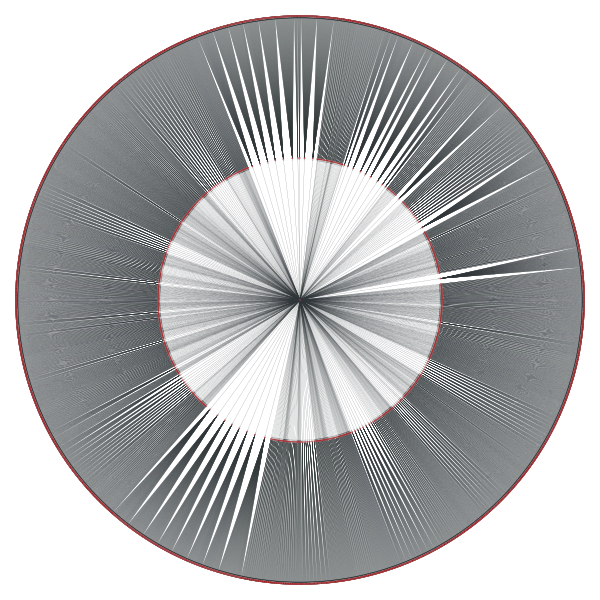

In [27]:
tree=tag_tree(tree)
nxgraph=tree

nx.write_gml(nxgraph, 'tmp.gml')
g = load_graph('tmp.gml')

graph_draw(g,pos=radial_tree_layout(g,4538),output='tmp.png')
show_img('tmp.png')

(array([  1.09920000e+04,   7.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
          800.,   900.,  1000.]),
 <a list of 10 Patch objects>)

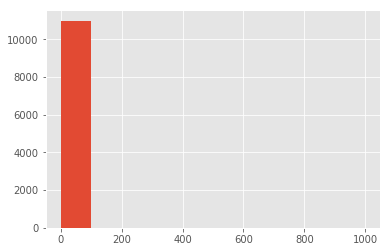

In [29]:
plt.hist(tree.all_nchild)

(array([ 748.,  141.,   33.,   38.,    6.,    9.,    2.,    0.,    0.,
           0.,    0.,    0.,    2.,    8.,    6.,    3.,    1.,    2.,
           0.,    1.]),
 array([   3.  ,    9.45,   15.9 ,   22.35,   28.8 ,   35.25,   41.7 ,
          48.15,   54.6 ,   61.05,   67.5 ,   73.95,   80.4 ,   86.85,
          93.3 ,   99.75,  106.2 ,  112.65,  119.1 ,  125.55,  132.  ]),
 <a list of 20 Patch objects>)

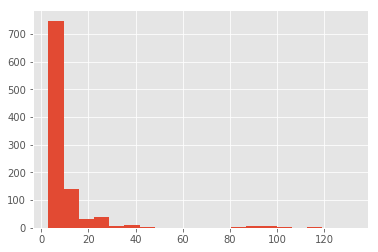

In [36]:
t=tree.all_nchild
t=np.array(t)
# t=t[t!=1]
t=t[t!=0]
t=t[t<250]
plt.hist(t,bins=20)

In [39]:
sav=[]
for fs in fine:
    sav.append(np.array([ nimgs[f] for f in fs]).sum())

(array([  1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,
          2.,   1.,   5.,   2.,   2.,   1.,   2.,   3.,   1.,   1.,   3.,
          2.,   0.,   2.,   4.,   5.,   1.,   6.,   7.,   1.,   2.,   6.,
          4.,   2.,   3.,   0.,   3.,   0.,   2.,   1.,   2.,   2.,   1.,
          4.,   4.,   5.,   9.,  10.,   8.,  14.,  14.,  20.,  20.,  25.,
         24.,  32.,  36.,  44.,  50.,  39.,  53.,  33.,  42.,  43.,  53.,
         39.,  38.,  29.,  32.,  27.,  24.,  27.,  24.,  14.,  11.,  12.,
         15.,   8.,   5.,   2.,   3.,   3.,   5.,   3.,   3.,   0.,   2.,
          2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([ 4649.  ,  4666.63,  4684.26,  4701.89,  4719.52,  4737.15,
         4754.78,  4772.41,  4790.04,  4807.67,  4825.3 ,  4842.93,
         4860.56,  4878.19,  4895.82,  4913.45,  4931.08,  4948.71,
         4966.34,  4983.97,  5001.6 ,  5019.23,  5036.86,  5054.49,
         5072.12,  5089.75,  5107.38,  5125.01

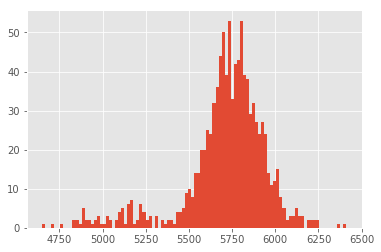

In [41]:
plt.hist(sav,bins=100)